
<font color="blue"> Ejercicio 1. Importa los datos del fichero "Juegos2.dat". Se pide:
* Construye las tablas de contingencia de Genero respecto a Fecha de frecuencias conjuntas absolutas y relativas.
  
* Dibuja el diagrama de barras de esa tabla.
*  Construye la tabla de frecuencias marginales.
* Construye las tablas de frecuencias condicionadas.
* Indica las siguientes frecuencias relativas:
* Proporción de juegos de plataformas que se han hecho en 2003.
* Proporción de juegos hechos en 2003.
* Proporción de juegos de deportes.
* Dentro de los juegos hechos en 2001, proporción de juegos de acción.
*  Dentro de los juegos de deportes, proporción de juegos hechos entre 2002 y 2004.
</font>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
juegos2 = pd.read_csv('Juegos2.dat', delimiter=" ")
print(juegos2.head())

                                    Nombre Plataforma  Fecha    Genero  \
18           Grand Theft Auto: San Andreas        PS2   2004    Action   
25             Grand Theft Auto: Vice City        PS2   2002    Action   
39                    Grand Theft Auto III        PS2   2001    Action   
60                          Super Mario 64         DS   2004  Platform   
91  Grand Theft Auto: Liberty City Stories        PSP   2005    Action   

    VentasEEUU  VentasEU  VentasJP  VentasOtros  Ventas  
18        9.43      0.40      0.41        10.57   20.81  
25        8.41      5.49      0.47         1.78   16.15  
39        6.99      4.51      0.30         1.30   13.10  
60        5.08      3.11      1.25         0.98   10.42  
91        2.90      2.83      0.24         1.75    7.72  


In [17]:
juegos2.to_csv('Juegos2.csv', index=False)

In [18]:
# Cargar los datos del archivo 'Juegos2.dat'
juegos = pd.read_csv('Juegos2.csv')
juegos

,Nombre,Plataforma,Fecha,Genero,VentasEEUU,VentasEU,VentasJP,VentasOtros,Ventas
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,16.15
2,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,13.10
3,Super Mario 64,DS,2004,Platform,5.08,3.11,1.25,0.98,10.42
4,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,2.90,2.83,0.24,1.75,7.72
...,...,...,...,...,...,...,...,...,...
1636,Razor Freestyle Scooter,GBA,2001,Sports,0.01,0.00,0.00,0.00,0.01
1637,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,0.01
1638,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,0.01
1639,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.01


In [19]:
# Mostrar las primeras filas del dataframe para ver su estructura
#print(juegos2.head())
print(juegos.columns)
juegos['Genero']

Index(['Nombre', 'Plataforma', 'Fecha', 'Genero', 'VentasEEUU', 'VentasEU',
       'VentasJP', 'VentasOtros', 'Ventas'],
      dtype='object')


0         Action
1         Action
2         Action
3       Platform
4         Action
          ...   
1636      Sports
1637      Action
1638      Action
1639    Platform
1640    Platform
Name: Genero, Length: 1641, dtype: object

In [20]:
# (a) Construir las tablas de contingencia de Genero respecto a Fecha
n_ij = pd.crosstab(juegos['Genero'], juegos['Fecha'])
print(n_ij)

Fecha     2001  2002  2003  2004  2005
Genero                                
Action      64   125   144   125   192
Platform    41    77    87    66    83
Sports      96   188   125   106   122


In [21]:
# Calcular las frecuencias relativas conjuntas
f_ij = n_ij / n_ij.sum().sum()
print(f_ij)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.039001  0.076173  0.087751  0.076173  0.117002
Platform  0.024985  0.046923  0.053016  0.040219  0.050579
Sports    0.058501  0.114564  0.076173  0.064595  0.074345


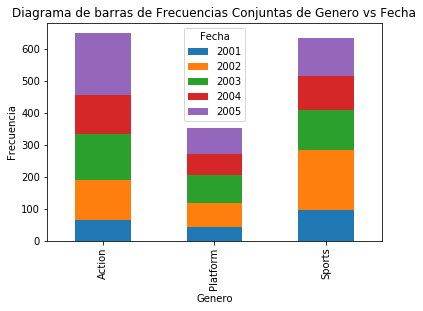

In [22]:
# (b) Dibujar el diagrama de barras
n_ij.plot(kind='bar', stacked=True)
plt.title('Diagrama de barras de Frecuencias Conjuntas de Genero vs Fecha')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
# (c) Construir la tabla de frecuencias marginales
marginales_absolutas = n_ij.sum(axis=1)  # Marginales por filas (Genero)
print(marginales_absolutas)

Genero
Action      650
Platform    354
Sports      637
dtype: int64


In [24]:
marginales_relativas = n_ij.sum(axis=1) / n_ij.sum().sum()  # Relativas por filas
print(marginales_relativas)

Genero
Action      0.396100
Platform    0.215722
Sports      0.388178
dtype: float64


In [25]:
# (d) Tablas de frecuencias condicionadas

# Frecuencias condicionadas por columnas (Genero condicionado a Fecha)
cond_columnas = n_ij.div(n_ij.sum(axis=0), axis=1)
print(cond_columnas)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.318408  0.320513  0.404494  0.420875  0.483627
Platform  0.203980  0.197436  0.244382  0.222222  0.209068
Sports    0.477612  0.482051  0.351124  0.356902  0.307305


In [27]:

# Mostrar frecuencias condicionadas por columnas en porcentaje
cond_columnas_percent = cond_columnas * 100
print(cond_columnas_percent)


Fecha          2001       2002       2003       2004       2005
Genero                                                         
Action    31.840796  32.051282  40.449438  42.087542  48.362720
Platform  20.398010  19.743590  24.438202  22.222222  20.906801
Sports    47.761194  48.205128  35.112360  35.690236  30.730479


In [28]:
# Frecuencias condicionadas por filas (Fecha condicionada a Genero)
cond_filas = n_ij.div(n_ij.sum(axis=1), axis=0)
print(cond_filas)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.098462  0.192308  0.221538  0.192308  0.295385
Platform  0.115819  0.217514  0.245763  0.186441  0.234463
Sports    0.150706  0.295133  0.196232  0.166405  0.191523


In [29]:
# Mostrar frecuencias condicionadas por filas en porcentaje
cond_filas_percent = cond_filas * 100
print(cond_filas_percent)

Fecha          2001       2002       2003       2004       2005
Genero                                                         
Action     9.846154  19.230769  22.153846  19.230769  29.538462
Platform  11.581921  21.751412  24.576271  18.644068  23.446328
Sports    15.070644  29.513344  19.623234  16.640502  19.152276


In [30]:
# (e) Frecuencias relativas:

# Proporción de juegos de plataformas que se han hecho en 2003
prop_plataformas_2003 = f_ij.loc['Platform', 2003] * 100
print(f'Proporción de juegos de plataformas que se han hecho en 2003: {prop_plataformas_2003}%')

Proporción de juegos de plataformas que se han hecho en 2003: 5.301645338208409%


In [31]:
# Proporción de juegos hechos en 2003
prop_juegos_2003 = f_ij.loc[:, 2003].sum() * 100
print(f'Proporción de juegos hechos en 2003: {prop_juegos_2003}%')

Proporción de juegos hechos en 2003: 21.694088970140157%


In [32]:

# Proporción de juegos de deportes
prop_deportes = f_ij.loc['Sports', :].sum() * 100
print(f'Proporción de juegos de deportes: {prop_deportes}%')

Proporción de juegos de deportes: 38.81779402803169%


In [33]:
# Dentro de los juegos hechos en 2001, proporción de juegos de acción
prop_accion_2001 = cond_columnas.loc['Action', 2001] * 100
print(f'Proporción de juegos de acción hechos en 2001: {prop_accion_2001}%')

Proporción de juegos de acción hechos en 2001: 31.8407960199005%


In [34]:
# Dentro de los juegos de deportes, proporción de juegos hechos entre 2002 y 2004
prop_deportes_2002_2004 = cond_filas.loc['Sports', 2002:2004].sum() * 100
print(f'Proporción de juegos de deportes hechos entre 2002 y 2004: {prop_deportes_2002_2004}%')


Proporción de juegos de deportes hechos entre 2002 y 2004: 65.77708006279434%


In [35]:
# Ejercicio 2: Construcción de la tabla de contingencia
gen = ['Hombre', 'Hombre', 'Hombre', 'Mujer', 'Mujer', 'Mujer']
pelo = ['Castaño', 'Moreno', 'Rubio', 'Castaño', 'Moreno', 'Rubio']
frec = [12, 8, 5, 20, 10, 25]

# Construir la tabla de contingencia
tabla_contingencia = pd.crosstab(pd.Series(gen), pd.Series(pelo), values=frec, aggfunc='sum')
print(tabla_contingencia)


col_0   Castaño  Moreno  Rubio
row_0                         
Hombre       12       8      5
Mujer        20      10     25


count    38.000000
mean      0.825000
std       0.260776
min       0.510000
25%       0.555000
50%       0.830000
75%       1.032500
max       1.390000
Name: VentasJP, dtype: float64


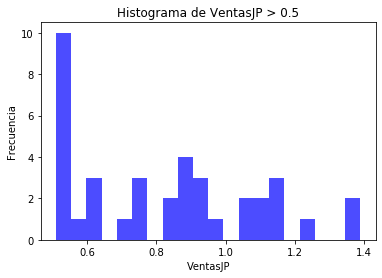

count    15.000000
mean      0.815333
std       0.212901
min       0.510000
25%       0.670000
50%       0.830000
75%       0.985000
max       1.130000
Name: VentasJP, dtype: float64


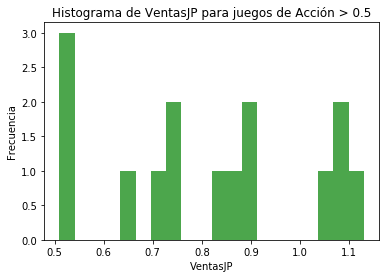

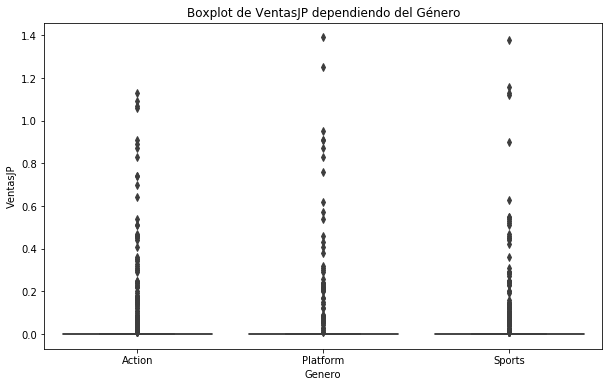

In [36]:

# Ejercicio 3: Análisis de las VentasJP mayores que 0.5
VentasJP = juegos2['VentasJP']

# (a) Sumario y histograma para VentasJP > 0.5
VentasJP_0_5 = VentasJP[VentasJP > 0.5]
print(VentasJP_0_5.describe())

# Histograma
plt.hist(VentasJP_0_5, bins=20, color='blue', alpha=0.7)
plt.title('Histograma de VentasJP > 0.5')
plt.xlabel('VentasJP')
plt.ylabel('Frecuencia')
plt.show()

# (b) Repetir para los datos de juegos de Acción
juegos_accion = juegos2[juegos2['Genero'] == 'Action']
VentasJP_accion = juegos_accion['VentasJP'][juegos_accion['VentasJP'] > 0.5]
print(VentasJP_accion.describe())

# Histograma
plt.hist(VentasJP_accion, bins=20, color='green', alpha=0.7)
plt.title('Histograma de VentasJP para juegos de Acción > 0.5')
plt.xlabel('VentasJP')
plt.ylabel('Frecuencia')
plt.show()

# (c) Boxplot dependiendo del género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='VentasJP', data=juegos2)
plt.title('Boxplot de VentasJP dependiendo del Género')
plt.show()
